In [ ]:
# Plot for group of biases ====> 1st VARIANT

In [3]:
%pylab inline
import seaborn as sns
#sns.set_style("whitegrid")
plt.rcParams['patch.linewidth'] = 0.5  
plt.rcParams['patch.edgecolor'] ="black"# 'white' 
plt.rcParams['lines.markeredgewidth']=0.5
plt.rcParams['boxplot.showfliers']=False
#'markerfacecolor'
#print rcParams.keys()
#plt.rcParams['figure.edgecolor'] ='white' 

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from scipy import stats  
import json
def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)
f_bias_prop=load_simple_json('de/f_bias_labour.json')
n_bias_prop=load_simple_json('de/n_bias_labour.json')
n_n_bias_prop=load_simple_json('de/n_n_bias_labour.json')
m_bias_prop=load_simple_json('de/m_bias_labour.json')
n_pages_lev=load_simple_json('de/wiki/m_neutral_lev.json')
                       
f_df=pd.DataFrame.from_dict(f_bias_prop)
n_df=pd.DataFrame.from_dict(n_bias_prop)
n_n_df=pd.DataFrame.from_dict(n_n_bias_prop)
m_df=pd.DataFrame.from_dict(m_bias_prop)
print "Male bias [n={0}].".format(len(m_df))
print "Female bias [n={0}]:".format(len(f_df))
f_df["Bias"]="female"
m_df["Bias"]="male"
n_df["Bias"]="neutral"
n_n_df["Bias"]="neutral"
f_df["page_exist"]="only female"#female form of profession
m_df["page_exist"]="only male"
n_df["page_exist"]="female&male"
n_df.loc[n_df["name"].isin(n_pages_lev.keys()),"page_exist"]="only neutral"
n_n_df["page_exist"]="only neutral"
all_together = pd.concat([n_df,n_n_df,f_df,m_df],ignore_index=True)
f_df

Male bias [n=799].
Female bias [n=6]:


,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name,Bias,page_exist
0,Berufe in der Hauswirtschaft,93.691910,8321,83212,6.308090,190866,Haushälter,female,only female
1,Betriebsinterne Wahlämter,32.042925,7123,71234,67.957075,12580,Gleichstellungsbeauftragter,female,only female
2,"Berufe Geburtshilfe, Entbindungspflege",99.843137,8135,81353,0.156863,10200,Entbindungspfleger,female,only female
3,"Berufe Gesundheits-, Krankenpflege (o.S)",84.959672,8130,81301,15.040328,807755,Pflegediensthelfer,female,only female
4,Berufe in der Hauswirtschaft,93.691910,8321,83212,6.308090,190866,Beschließer,female,only female
5,"Berufe Geburtshilfe, Entbindungspflege",99.843137,8135,81353,0.156863,10200,Belegentbindungspfleger,female,only female


In [3]:
print "Neutral(male&female profession label on Wiki) [n={0}]:".format(len(all_together[all_together.page_exist=="female&male"]))
all_together[all_together.page_exist=="female&male"]

Neutral(male&female profession label on Wiki) [n=12]:


,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name,Bias,page_exist
0,"Obj.Pers.Brandschutz,Arbeitssicherh(ssT)",37.700505,5318,53182,62.299495,8915,Hilfspolizist,neutral,female&male
3,Führung - Allgemeinbildende Schulen,62.997543,8419,84194,37.002457,2035,Direktor,neutral,female&male
4,Berufe für Post- und Zustelldienste,47.894039,5132,51321,52.105961,205963,Bote,neutral,female&male
5,Angehörige gesetzgebender Körperschaften,18.156809,7121,71214,81.843191,2908,Bundeskanzler,neutral,female&male
6,Berufe in der Gemeindearbeit,58.613996,8332,83323,41.386004,10303,Diakon,neutral,female&male
9,"Angehörige geistl. Orden, Mutterhäuser",62.571104,8333,83332,37.428896,879,Mönch,neutral,female&male
10,"Berufe im Veranstaltungsservice,-manag.",58.326084,6340,63401,41.673916,27588,Host,neutral,female&male
12,Berufe in der Landwirtschaft (o.S.),21.576590,1110,11101,78.423410,124357,Knecht,neutral,female&male
13,"Apotheker, Pharmazeuten",83.810209,8180,81804,16.189791,37536,Apotheker,neutral,female&male
16,"Angehörige geistl. Orden, Mutterhäuser",62.571104,8333,83332,37.428896,879,Ordensbruder,neutral,female&male


In [4]:
print "Neutral (only neutral label exist) [n={0}]:".format(len(all_together[all_together.page_exist=="only neutral"]))
all_together[all_together.page_exist=="only neutral"]

Neutral (only neutral label exist) [n=42]:


,Berufsgruppe,Frauen,KldB,KldB5,Männer,Overall,name,Bias,page_exist
1,"Musik-,Gesangs-, Dirigententätigk. (ssT)",35.508637,9418,94183,64.491363,521,Audiodesigner,neutral,only neutral
2,"Aufsicht,Führung-TheaterFilm,Fernsehprod",40.187288,9449,94494,59.812712,5019,Filmgeschäftsführer,neutral,only neutral
7,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884,Medientechniker,neutral,only neutral
8,"Berufe Informations,Telekommunikationst.",11.438161,2631,26313,88.561839,191884,Projektassistent,neutral,only neutral
11,Berufe i.d. Bühnen- und Kostümbildnerei,70.973668,9461,94612,29.026332,3266,Dekorationenmaler,neutral,only neutral
14,Berufe in der Bautischlerei,2.720148,3333,33332,97.279852,23859,Messebauer,neutral,only neutral
15,"Aufsicht,Führung-Krankenpfl.,Rettungsd.",78.356648,8139,81394,21.643352,36815,Pflegedienstleiter,neutral,only neutral
19,Berufe in der Elektrotechnik (o.S.),25.599873,2630,26302,74.400127,220505,Elektrofachkraft,neutral,only neutral
20,"Berufe Wasserversorgung,Abwassertechnik",3.556357,3431,34312,96.443643,27725,Fachkraft für Wasserversorgungstechnik,neutral,only neutral
21,"Athleten, Berufssportler",8.496605,9424,94243,91.503395,5155,Jockey,neutral,only neutral


### var1

Median male bias:  35.5086372361
Median neutral bias:  28.271740593
Median female bias:  93.6919095072


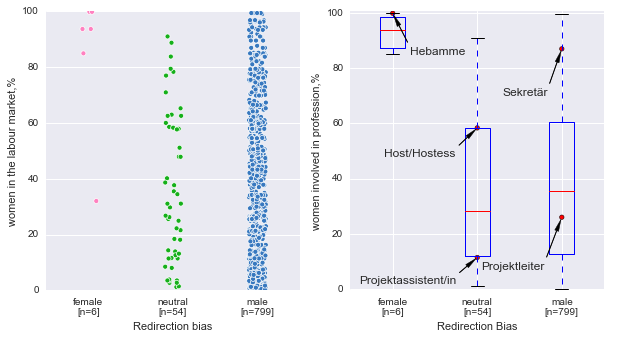

In [72]:
fig, big_axes = plt.subplots( figsize=(10,5) , nrows=1, ncols=2)
for row, big_ax in enumerate(big_axes, start=1):
    #big_ax.set_title(groups.size().index[row-1].title()+" dominnated professions", fontsize=12)
    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
ax1 = fig.add_subplot(1,2,1) 


colors = ["pink","green","windows blue", "amber", "greyish", "faded green", "dusty purple"]
with sns.xkcd_palette(colors):#sns.color_palette("pastel", len(set(all_together.Bias.values))):
    sns.stripplot(x="Bias",y="Frauen",order=["female","neutral", "male"],
               data=all_together,jitter=True,edgecolor='white',linewidth=0.7)#,hue="smoker",split=True)
    ax1.set_ylabel('women in the labour market,%')
    ax1.set_xlabel('Redirection bias')
    ax1.set_ylim(0,100)
    
f_df2=all_together[all_together.page_exist=="only female"].Frauen
m_df2=all_together[all_together.page_exist=="only male"].Frauen
n_df2=pd.concat([n_df.Frauen,n_n_df.Frauen])

ax1.set_xticklabels(["female\n[n={}]".format(len(f_df2)),"neutral\n[n={}]".format(len(n_df2)),"male\n[n={}]".format(len(m_df2))])


ax2= fig.add_subplot(1,2,2)
ax2.boxplot([f_df2,n_df2,m_df2], )
ax2.set_xticklabels(["female\n[n={}]".format(len(f_df2)),"neutral\n[n={}]".format(len(n_df2)),"male\n[n={}]".format(len(m_df2))])
#ax2.set_xticks([1,2,3],["female bias\n[n={}]".format(len(f_df2)),"neutral\n[n={}]".format(len(n_df2)),"male bias\n[n={}]".format(len(m_df2))])
#ax2.ylabel("women in labour market, %")

ax2.scatter(x=[1,3,3,2,2],y=[all_together[all_together.name=="Entbindungspfleger"].Frauen.values[0],
                all_together[all_together.name==u"Sekretär"].Frauen.values[0],
                all_together[all_together.name==u"Projektleiter"].Frauen.values[0],
                           all_together[all_together.name==u"Host"].Frauen.values[0],
                            all_together[all_together.name==u"Projektassistent"].Frauen.values[0]],
                 c=["r","r","r","r"])
ax2.annotate('Hebamme', xy=(1, all_together[all_together.name=="Entbindungspfleger"].Frauen.values[0]), xytext=(1.2, 85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
ax2.annotate(u"Sekretär", xy=(3, all_together[all_together.name==u"Sekretär"].Frauen.values[0]), xytext=(2.3, 70),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
ax2.annotate(u"Projektleiter", xy=(3, all_together[all_together.name==u"Projektleiter"].Frauen.values[0]), xytext=(2.05, 7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
ax2.annotate(u"Host/Hostess", xy=(2, all_together[all_together.name==u"Host"].Frauen.values[0]), xytext=(0.9, 48),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
ax2.annotate(u"Projektassistent/in", xy=(2, all_together[all_together.name==u"Projektassistent"].Frauen.values[0]),
             xytext=(0.6, 2),   arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
ax2.set_xlabel("Redirection Bias")
ax2.set_ylabel('women involved in profession,%')
ax2.set_ylim(-0.5,100.5)
fig.show()
fig.savefig("de/labour_market_redirect.png",dpi=500)

print "Median male bias: ",m_df2.median()
print "Median neutral bias: ",n_df2.median()
print "Median female bias: ",f_df2.median()

# significanse test 

Then we check whether all groups follow the same distribution. In order to do so, we perform Mann-Whitney-Wilcoxon RankSum test. The null hypothesis is that all instances of two groups are independent and identically distributed. The alternative hypothesis is that all instances of the first group are independent and identically distributed according to some underlying distribution F_X and all instances of the second group are independent and identically distributed according to some underlying distribution F_Y but F_X differs from F_Y.

In [18]:
f_=all_together[all_together.page_exist=="only female"].Frauen.tolist()
n_=all_together[all_together.page_exist=="female&male"].Frauen.tolist()
m_=all_together[all_together.page_exist=="only male"].Frauen.tolist()
n_n_=all_together[all_together.page_exist=="only neutral"].Frauen.tolist()

z_stat, p_val = stats.ranksums(m_, f_)  
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_, n_+n_n_)   
print "MWW RankSum P for male and neutral distributions =", p_val ,"z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+n_n_, f_)  
print "MWW RankSum P for neutral and female distributions =", p_val  , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+n_n_+m_+f_, f_)  
print "MWW RankSum P for all together and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+n_n_+f_+m_, n_+n_n_)  
print "MWW RankSum P for all together and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+n_n_+f_+m_, m_)  
print "MWW RankSum P for all together and male distributions =", p_val , "z_stat=",z_stat


#with Bonferroni correction (3*2/2=3)=> alpha=0.05/3=0.0167 # in order to controlling the familywise error rate
#p-val should be smaller than 0.0167

MWW RankSum P for male and female distributions = 0.000888464276433 z_stat= -3.32365376474
MWW RankSum P for male and neutral distributions = 0.401687143991 z_stat= 0.838611876286
MWW RankSum P for neutral and female distributions = 0.000804806421507 z_stat= -3.35113642833
MWW RankSum P for all together and female distributions = 0.000915003594479 z_stat= -3.31543578854
MWW RankSum P for all together and neutral distributions = 0.393021634532 z_stat= 0.854150448439
MWW RankSum P for all together and male distributions = 0.965894830531 z_stat= 0.0427575157314


| | p-val | z | 
| :-|:-:|
| male bias & female bias |    8.88e-04     |    -3.32    |
| male bias & neutral |     0.40     |    0.83    | 
| neutral & female bias |     8.04e-04     |      -3.35    |

In [68]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_all=[0.000888464276433,0.401687143991,0.000804806421507]
names_c=["male bias & female bias","male bias & neutral","neutral & female bias"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')[:2]
print "-"*75
print " ======================================== | p-value_old | reject | p-value_corrected"
print "-"*75
for i in range(0,len(names_c)):
    print "{:<46}  {:<3.2e} {!r:>7}   {:<3.5f}".format(names_c[i],p_all[i],res[0][i],res[1][i])

Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
 ======================================== | p-value_old | reject | p-value_corrected
---------------------------------------------------------------------------
male bias & female bias                         8.88e-04    True   0.00044
male bias & neutral                             4.02e-01   False   0.13390
neutral & female bias                           8.05e-04    True   0.00044


| | p-val | z | reject null |
| :-|:-:|:-:|
| male bias & female bias |    8.88e-04     |    -3.32    |  4.44e-04 |
| male bias & neutral |     0.40     |    0.83    |  1.34e-01 |  
| neutral & female bias |     8.04e-04     |      -3.35    |   4.44e-04 |


In [22]:
#we can use Kruskal–Wallis test (for comparing two or more independent samples of equal or different sample sizes)
from scipy.stats.mstats import kruskalwallis
H, pval = kruskalwallis(m_,f_,n_+n_n_)
print "H-statistic:\t%s\nP-value:\t%s" % (str(H),str(pval))
if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")
# A significant Kruskal-Wallis test indicates that at least one sample stochastically dominates one other sample.
#The test does not identify where this stochastic dominance occurs or for how many pairs of groups stochastic
#dominance obtains. Dunn's test[5] would help analyze the specific sample pairs for stochastic dominance.

H-statistic:	11.8479647609
P-value:	0.00267452795285
Reject NULL hypothesis - Significant differences exist between groups.


dependent variable: the percentage of women involved in profession;
independent variable: bias category

The results suggest that there is a statistically significant difference between the underlying distributions of:

1) the percentage of women involved in male bias professions and the percentage of women involved in female bias professions (z = -3.32, p = 8.88e-04). 

2) the percentage of women involved in no bias (neutral) professions and the percentage of women involved in female bias professions (z = -3.35, p = 8.04e-04).

There is no statistically significant difference between the underlying distributions of the percentage of women involved in male bias professions and the percentage of women involved in no bias (neutral) professions (z = 0.83, p = 0.4).

# Fit logistic regression model (predict female bias)

In [4]:
%pylab inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,confusion_matrix,classification_report
from sklearn.cross_validation import train_test_split 
from sklearn.learning_curve import learning_curve
from sklearn.metrics import roc_curve, auc
from statsmodels.tools import categorical

import pandas as pd

from sklearn import cross_validation
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

def reject_outliers2(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
def load_data():
    df=pd.read_csv("de/all_data_bias_labour_gender_all_persons.csv",sep="\t",index_col=0)
    df2=df[["labor_market_woman","Bias"]]
    df2=df2.dropna()
    df2.drop(["Apothekerin","Botin","Bundeskanzlerin","Diakonin","Direktrice","Politesse","Hostess","Magd",
         "Mannequin","Nonne","Ordensschwester","Taxifahrerin"],inplace=True)
    print len(df),len(df2)
    df2["Bias2"]=df2.Bias.apply(lambda x: 0 if x=="male" else 1 if x=="neutral" else 2 )


    dff_m=reject_outliers2(df2[df2.Bias=="male"].labor_market_woman.values)
    dff_f=reject_outliers2(df2[df2.Bias=="female"].labor_market_woman.values)
    dff_n=reject_outliers2(df2[df2.Bias=="neutral"].labor_market_woman.values)
    df_df = pd.DataFrame({'labor_market_woman':np.append(dff_m,values=np.append(dff_f,dff_n)),
                          'Bias':["male"]*len(dff_m)+["female"]*len(dff_f)+["neutral"]*len(dff_n)})
    df_df["Bias2"]=df_df.Bias.apply(lambda x: 0 if x=="male" else 1 if x=="neutral" else 2 )
    return df_df

def predict_model(predict_case,remove=False,train_split=True):
    
    df_df=load_data()
    if remove=="neutral":
        df_df=df_df[(df_df["Bias2"]==0)|(df_df["Bias2"]==2)]
    elif remove=="male":
        df_df=df_df[(df_df["Bias2"]==1)|(df_df["Bias2"]==2)]
    df_df["Bias2"]=df_df.Bias.apply(lambda x: 1 if x==predict_case else 0 )
    
    data = df_df[["labor_market_woman","Bias2"]]
    data=sm.add_constant(data, prepend=False)
    train_cols = data.columns[0]
    y=data['Bias2']
    X=data[train_cols]
    X=sm.add_constant(X, prepend=False)
    X=X.rename(columns = {'const':'intercept'})

    #res1 = sm.MNLogit(y, X) 
    if train_split==True:
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
        print len(X_train), len(X_test), len(X_train) + len(X_test)
    else:
        X_train,Y_train=X,y
    res1=sm.Logit(Y_train, X_train) 
    mlogit_res = res1.fit()
    print mlogit_res.params
    print mlogit_res.summary()
    print mlogit_res.pred_table()
    acc=float(sum(mlogit_res.pred_table().diagonal()))/float(len(Y_train))
    print "Accuracy:",acc
    print "Odds:\n", np.exp(mlogit_res.params)
    print "p:\n", np.exp(mlogit_res.params)/(1+np.exp(mlogit_res.params))

    return mlogit_res


Populating the interactive namespace from numpy and matplotlib


In [69]:
df_df=load_data()
female_pred_full=predict_model(predict_case="female",train_split=False)

885 859
Optimization terminated successfully.
         Current function value: 0.014341
         Iterations 14
labor_market_woman     0.364305
intercept            -35.534682
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  840
Model:                          Logit   Df Residuals:                      838
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6064
Time:                        20:10:22   Log-Likelihood:                -12.047
converged:                       True   LL-Null:                       -30.605
                                        LLR p-value:                 1.113e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
labo

In [94]:
print "probability of being in female bias group given 2% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*2)))

print "probability of being in female bias group given 20% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*20)))

print "probability of being in female bias group given 80% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*80)))

print "probability of being in female bias group given 90% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*90)))

print "probability of being in female bias group given 95% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*95)))

print "probability of being in female bias group given 98% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*98)))

print "probability of being in female bias group given 99% of woman in labor market:"
print 1.0/(1+np.exp(-(female_pred_full.params[1]+female_pred_full.params[0]*99)))

probability of being in female bias group given 2% of woman in labor market:
7.65447166167e-16
probability of being in female bias group given 20% of woman in labor market:
5.3925996984e-13
probability of being in female bias group given 80% of woman in labor market:
0.00167499434126
probability of being in female bias group given 90% of woman in labor market:
0.0602439875119
probability of being in female bias group given 95% of woman in labor market:
0.283799589728
probability of being in female bias group given 98% of woman in labor market:
0.54170879189
probability of being in female bias group given 99% of woman in labor market:
0.629839638539


In [207]:
#use only 80% of data
fem_pred=predict_model(predict_case="female")

885 859
672 168 840
Optimization terminated successfully.
         Current function value: 0.017014
         Iterations 14
labor_market_woman     0.344288
intercept            -33.503123
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Bias2   No. Observations:                  672
Model:                          Logit   Df Residuals:                      670
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2016   Pseudo R-squ.:                  0.6122
Time:                        01:21:33   Log-Likelihood:                -11.433
converged:                       True   LL-Null:                       -29.485
                                        LLR p-value:                 1.871e-09
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

## consider in neutral group only professions with 2 articles

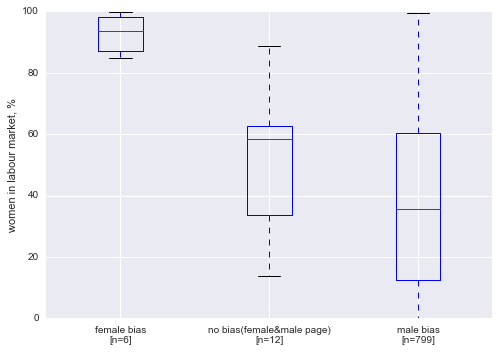

In [10]:
f_df2=all_together[all_together.page_exist=="only female"].Frauen
m_df2=all_together[all_together.page_exist=="only male"].Frauen
n_df2=all_together[all_together.page_exist=="female&male"].Frauen
pyplot.boxplot([f_df2,n_df2,m_df2])
pyplot.xticks([1,2,3],["female bias\n[n={}]".format(len(f_df2)),"no bias(female&male page)\n[n={}]".format(len(n_df2)),"male bias\n[n={}]".format(len(m_df2))])
pyplot.ylabel("women in labour market, %")
#pyplot.xlabel("Profession labels of Wiki pages")
pyplot.show()

In [19]:
 z_stat, p_val = stats.ranksums(m_, f_)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_, n_)  
print "MWW RankSum P for male and neutral distributions =", p_val ,"z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_, f_)  
print "MWW RankSum P for neutral and female distributions =", p_val  , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+m_+f_, f_)  
print "MWW RankSum P for all together and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+f_+m_, n_)  
print "MWW RankSum P for all together and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+f_+m_, m_)  
print "MWW RankSum P for all together and male distributions =", p_val , "z_stat=",z_stat

MWW RankSum P for male and female distributions = 0.000888464276433 z_stat= -3.32365376474
MWW RankSum P for male and neutral distributions = 0.0847385046498 z_stat= -1.72383017978
MWW RankSum P for neutral and female distributions = 0.0148867238335 z_stat= -2.43512311011
MWW RankSum P for all together and female distributions = 0.000982283024057 z_stat= -3.29555262954
MWW RankSum P for all together and neutral distributions = 0.0980107548006 z_stat= -1.65457491801
MWW RankSum P for all together and male distributions = 0.726986270702 z_stat= 0.349137252466


| | p-val | z |
| :-|:-:|:-:|
| male bias & female bias |    9.42e-04     |    -3.32    | 
| male bias & neutral |     0.084     |    -1.72    |  
| neutral & female bias |     0.015     |      -2.43    | 

| all_together & female bias |     9.84e-04    |     -3.29    | 
| all_together & neutral |     0.098    |     -1.65    | 
| all_together & male bias |     0.727    |     0.35    | 


We can reject null hypothesis for pairs male-female,neutral-female and all_together-female, i.e., two distributions are significantly different. In other words female professions that are represented in Wikipedia has significantly different distribution of involved in profession women. 

# 2nd VARIANT ====>  Group articles by gender of title

In [63]:
all_together = pd.concat([n_df,n_n_df,f_df,m_df],ignore_index=True)
f_val=load_simple_json('de/wiki/f_page_validated.json')
f_amb=load_simple_json('de/wiki/f_page_ambigious.json')
n_pages=load_simple_json('de/wiki/n_page_validated.json')
n_pages_lev=load_simple_json('de/wiki/m_neutral_lev.json')

words=load_simple_json('de/occupation_all.json')
words_revert={words[i][1]:i for i in words}#feminine:masculine
f_val_m=[]
f_val_m_onlyval=[]
for i in f_val:
    f_val_m.append(words_revert[i])
    f_val_m_onlyval.append(words_revert[i])
for i in f_amb:
    f_val_m.append(words_revert[i])
all_together.loc[all_together["name"].isin(n_pages),"label"]="neutral"
all_together.loc[all_together["name"].isin(n_pages_lev.keys()),"label"]="neutral"
all_together.loc[all_together["name"].isin(f_val_m),"label"]="female"
all_together.loc[all_together["name"].isin(m_df.name.values),"label"]="male"
#m_all_df=all_together[all_together.page_exist.isin(["only male","female&male"])]#811
#m_all_df.loc[:,"label"]="male"
m_f_df=all_together[all_together.page_exist=="female&male"]#12
m_f_df.loc[:,"label"]="male"
all_df=pd.concat([all_together,m_f_df],ignore_index=True)#871
all_df.to_csv('de/labour_market_for_all_pages.csv', sep='\t', encoding='utf-8')

In [49]:
f_=all_df[all_df["label"]=="female"].Frauen.tolist()
f_onlyval=all_together[all_together["name"].isin(f_val_m_onlyval)].Frauen.tolist() #f_val_m_onlyval
n_=all_df[all_df["label"]=="neutral"].Frauen.tolist()
m_=all_df[all_df["label"]=="male"].Frauen.tolist()

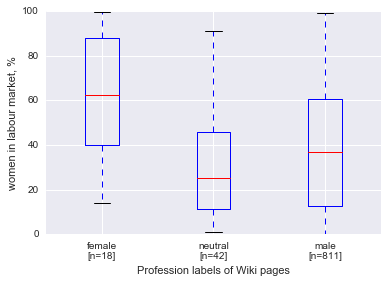

In [52]:
f_df2=all_df[all_df["label"]=="female"].Frauen
m_df2=all_df[all_df["label"]=="male"].Frauen
n_df2=all_df[all_df["label"]=="neutral"].Frauen
pyplot.boxplot([f_df2,n_df2,m_df2])
pyplot.xticks([1,2,3],["female\n[n={0}]".format(len(f_df2)),"neutral\n[n={0}]".format(len(n_df2)),"male\n[n={0}]".format(len(m_df2))])
pyplot.ylabel("women in labour market, %")
pyplot.xlabel("Gender of profession name of Wiki article")
pyplot.show()

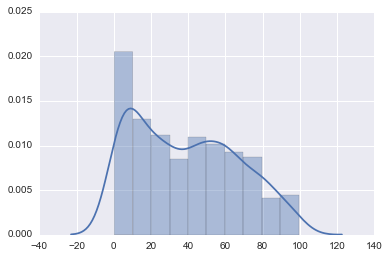

In [53]:
sns.distplot(m_)

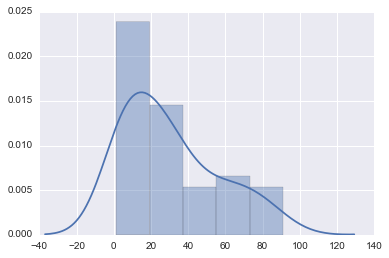

In [54]:
sns.distplot(n_)

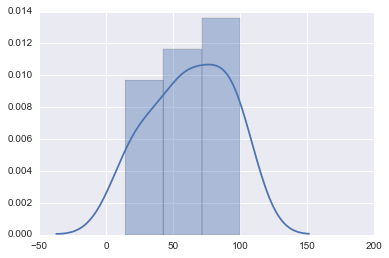

In [55]:
sns.distplot(f_)

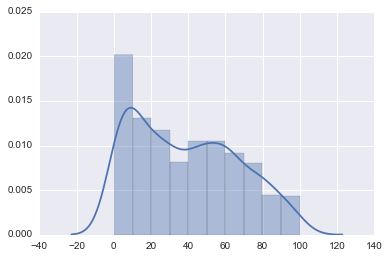

In [56]:
sns.distplot(f_+m_+n_)

### All data for Germany. Distribution of involved women

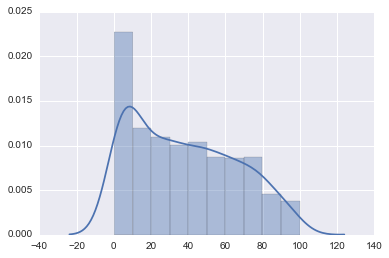

In [57]:
df_all_subgroups=pd.read_csv("de/labourmarket_subgroups.csv",sep='\t', encoding='utf-8',index_col=0)
all_frauen_ratio=df_all_subgroups.Frauen_ratio.values
sns.distplot(all_frauen_ratio)

# Tests of Significance

The null hypothesis is that all instances of X and Y are independent and identically distributed (iid).

Let us take as the alternate hypothesis that (a) all instances of X are iid according to some underlying distribution F_X and (b) all instances of Y are iid according to some underlying distribution F_Y but (c) F_X differs from F_Y. 

Mann-Whitney-Wilcoxon (MWW) RankSum test
The MWW RankSum test is a useful test to determine if two distributions are significantly different or not.

In [59]:
from scipy import stats  
  
z_stat, p_val = stats.ranksums(m_, f_)  
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_, n_)  
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_, f_)  
print "MWW RankSum P for neutral and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+m_+f_, f_)  
print "MWW RankSum P for all together and female distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+f_+m_, n_)  
print "MWW RankSum P for all together and neutral distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_+f_+m_, m_)  
print "MWW RankSum P for all together and male distributions =", p_val , "z_stat=",z_stat

MWW RankSum P for male and female distributions = 0.00102121367586 z_stat= -3.28461622826
MWW RankSum P for male and neutral distributions = 0.0557839582946 z_stat= 1.91271960265
MWW RankSum P for neutral and female distributions = 0.000207128266371 z_stat= -3.7101600418
MWW RankSum P for all together and female distributions = 0.00106014461881 z_stat= -3.27405903129
MWW RankSum P for all together and neutral distributions = 0.0546253733428 z_stat= 1.92184413219
MWW RankSum P for all together and male distributions = 0.974152243293 z_stat= 0.0324010272497


In [61]:
z_stat, p_val = stats.ranksums(n_+f_+m_, all_frauen_ratio)  
print "MWW RankSum P for those that have wikipedia page and all Germany labour market distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(f_, all_frauen_ratio)  
print "MWW RankSum P for those that have female wikipedia page and all Germany labour market distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(m_, all_frauen_ratio)  
print "MWW RankSum P for those that have male wikipedia page and all Germany labour market distributions =", p_val , "z_stat=",z_stat
z_stat, p_val = stats.ranksums(n_, all_frauen_ratio)  
print "MWW RankSum P for those that have neutral wikipedia page and all Germany labour market distributions =", p_val , "z_stat=",z_stat


MWW RankSum P for those that have wikipedia page and all Germany labour market distributions = 0.492401303559 z_stat= 0.686494544192
MWW RankSum P for those that have female wikipedia page and all Germany labour market distributions = 0.000750774810638 z_stat= 3.37033269226
MWW RankSum P for those that have male wikipedia page and all Germany labour market distributions = 0.518994425105 z_stat= 0.644896245275
MWW RankSum P for those that have neutral wikipedia page and all Germany labour market distributions = 0.0963858092114 z_stat= -1.6626335592


|pair  | p-val | z |
| :-|:-:|:-:|
| male & female |    0.001     |    -3.28    | 
| male & neutral |     0.056     |    1.91    |  
| neutral & female |     2.07e-04     |      -3.71    | 
| all_that_have_Wiki_page & female |     0.001    |     -3.27    | 
| all_that_have_Wiki_page & neutral |     0.055    |     1.92    | 
| all_that_have_Wiki_page & male |     0.974    |     0.03    | 
| all_that_have_Wiki_page & German labor market |     0.492    |     0.69    | 
| female & German labor market |     7.50e-04    |     3.37    | 
| male & German labor market |     0.51    |     0.64    | 
| neutral & German labor market |     0.096    |     -1.66    | 

|pair  | p-val | z |
| :-|:-:|:-:|
| male & female |    0.001     |    -3.28    | 
| male & neutral |     0.056     |    1.91    |  
| neutral & female |     2.07e-04     |      -3.71    | 
| all_that_have_Wiki_page & German labor market |     0.492    |     0.69    | 
| female & German labor market |     7.50e-04    |     3.37    | 
| male & German labor market |     0.51    |     0.64    | 
| neutral & German labor market |     0.096    |     -1.66    | 

# the Kolmogorov-Smirnov test

In [62]:
from scipy.stats import ks_2samp,ttest_1samp,kstest
print ks_2samp(m_, n_)
print ks_2samp(m_, f_)
print ks_2samp(f_, n_)
print ks_2samp(m_+n_+f_, m_)
print ks_2samp(m_+n_+f_, f_)
print ks_2samp(m_+n_+f_, n_)

Ks_2sampResult(statistic=0.20788562033938118, pvalue=0.054473445111893663)
Ks_2sampResult(statistic=0.3867653103164817, pvalue=0.0070933955390278169)
Ks_2sampResult(statistic=0.5, pvalue=0.0021245199617610125)
Ks_2sampResult(statistic=0.0048076038285288503, pvalue=1.0000000000000002)
Ks_2sampResult(statistic=0.38423268274014549, pvalue=0.0075745918499930624)
Ks_2sampResult(statistic=0.20307801651085233, pvalue=0.063497984844993915)
